In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime, date
end = date.today()
start =datetime(end.year-20,end.month,end.day)

In [ ]:
# Get user input for stock ticker and date range
stock = input("Enter the stock ticker (e.g., 'ADANIENT.NS'): ")
start =datetime(end.year-20,end.month,end.day)
end = date.today()

data=yf.download(stock,start,end)

Enter the stock ticker (e.g., 'ADANIENT.NS'): GOOG


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-03-24,4.443470,4.483381,4.442231,4.479414,148763520
2005-03-28,4.497262,4.581050,4.485611,4.503707,350830087
2005-03-29,4.451402,4.543370,4.414218,4.488090,259890496
2005-03-30,4.473216,4.498006,4.452145,4.477926,250378977
2005-03-31,4.474704,4.496519,4.403559,4.411244,271758815


In [ ]:
data.shape

(5031, 5)

In [ ]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,50.454608,50.967954,49.926994,50.433893,1.039420e+08
std,48.279604,48.790642,47.767525,48.251727,1.343733e+08
min,4.443470,4.483381,4.403559,4.411244,1.584340e+05
25%,13.505298,13.644612,13.373170,13.520913,2.617300e+07
50%,28.651756,28.854665,28.419995,28.678059,4.848104e+07
75%,68.343170,69.243784,67.239599,67.837196,1.274194e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-03-24 to 2025-03-21
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [ ]:
data.isna().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'closing price of google data')

<Figure size 1500x500 with 0 Axes>

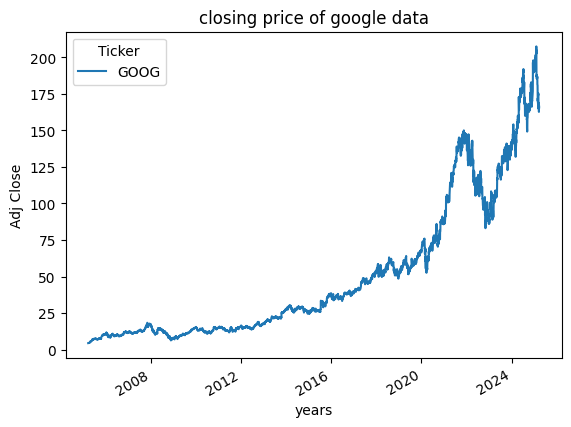

In [ ]:
plt.figure(figsize=(15,5))
data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Adj Close")
plt.title("closing price of google data")

In [ ]:
def plot_graph(figsize,values,column_name):
  plt.figure()
  values.plot(figsize=figsize)
  plt.xlabel("years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of {stock} data")

In [ ]:
data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

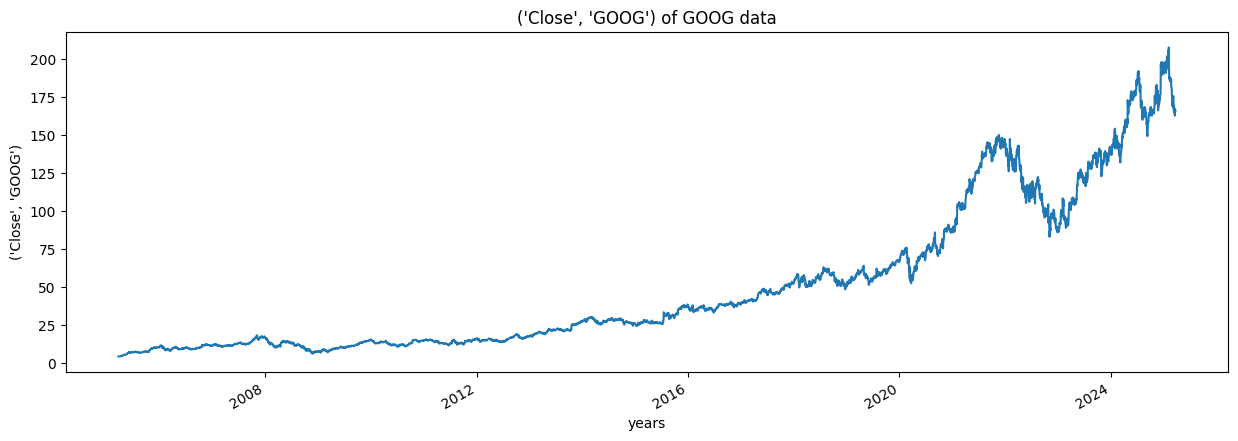

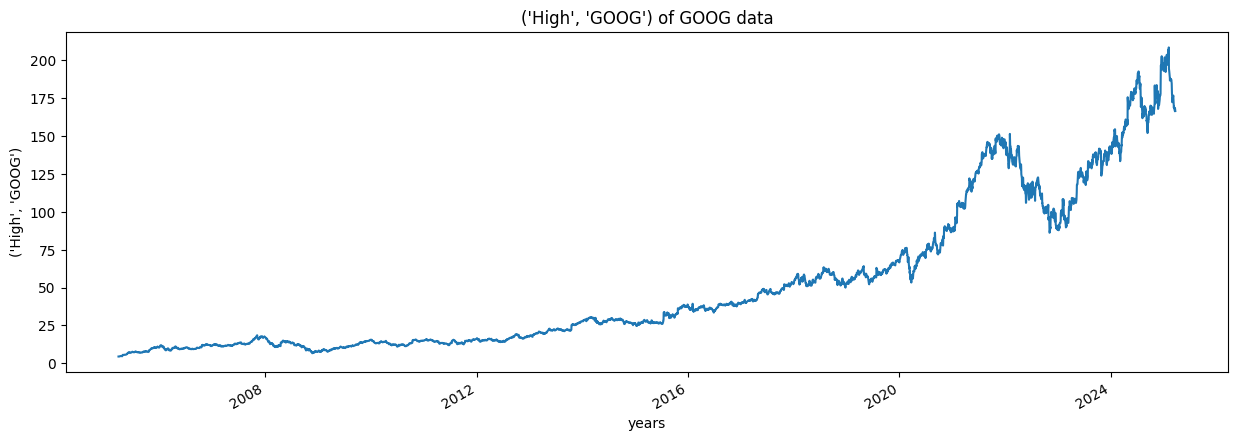

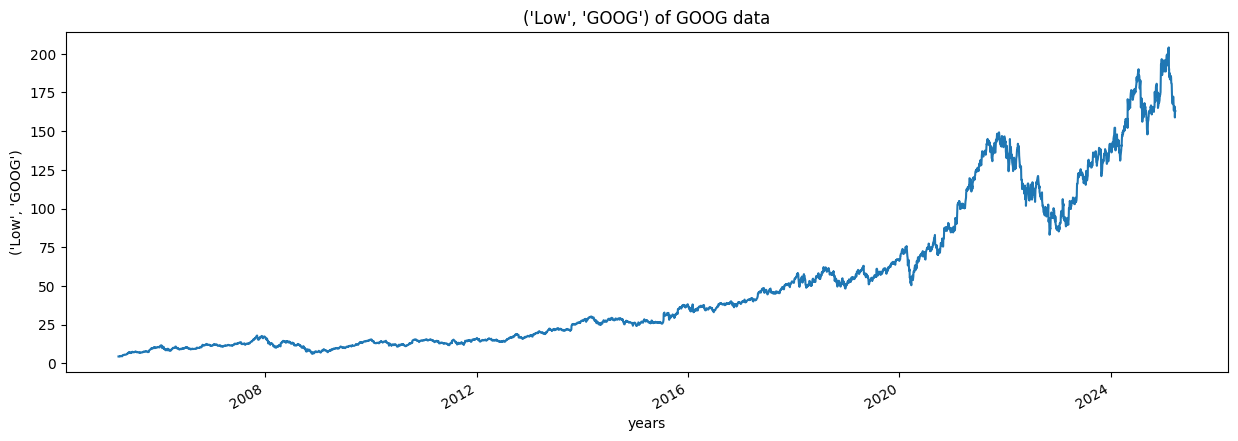

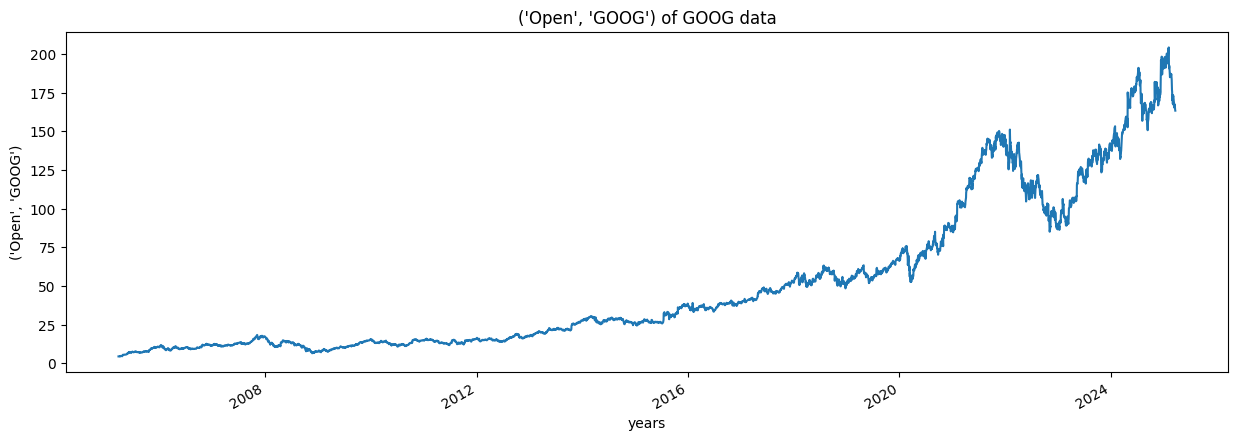

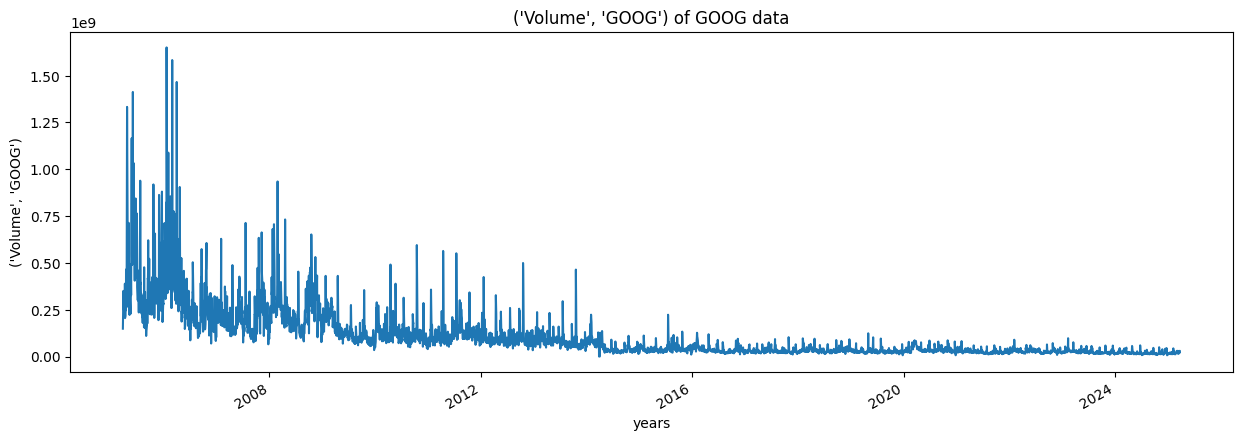

In [ ]:
for column in data.columns:
  plot_graph((15,5),data[column],column)

In [ ]:
for i in range (2004,2024):
  print(i,list(data.index.year).count(i))

2004 0
2005 196
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [ ]:
data['MA_for_250_days']=data['Close'].rolling(250).mean()

In [ ]:
data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2006-03-15,NaN
2006-03-16,NaN
2006-03-17,NaN
2006-03-20,NaN
2006-03-21,7.989949


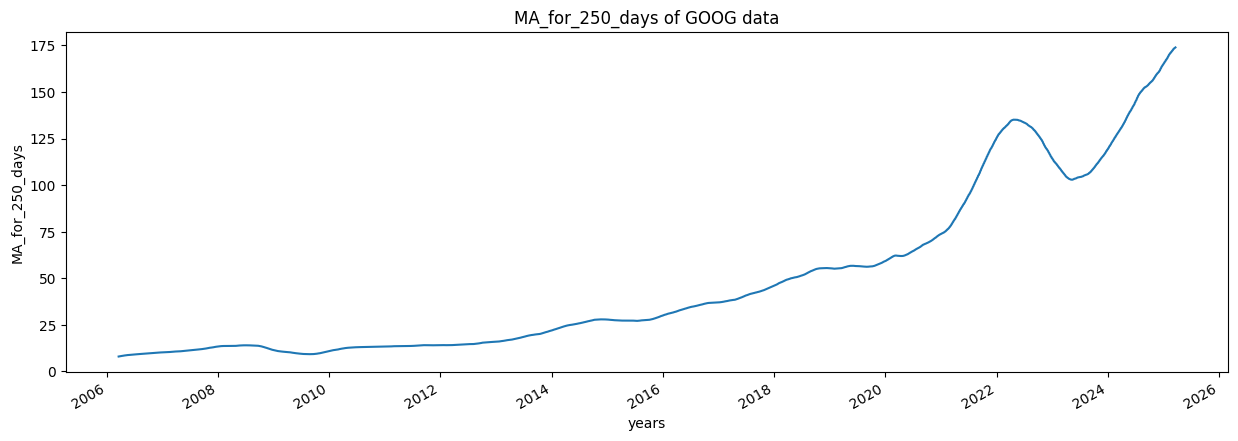

In [ ]:
plot_graph((15,5),data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

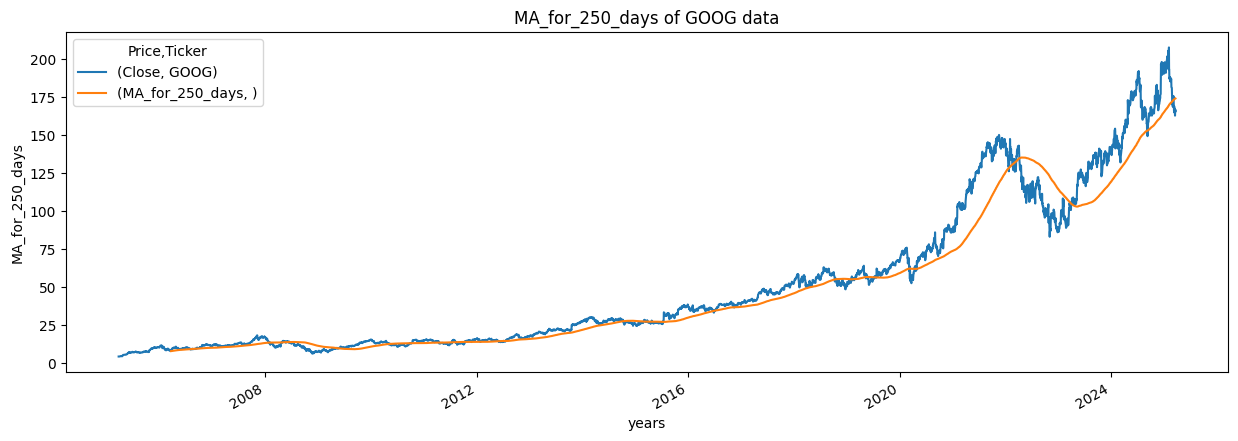

In [ ]:
plot_graph((15,5),data[['Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

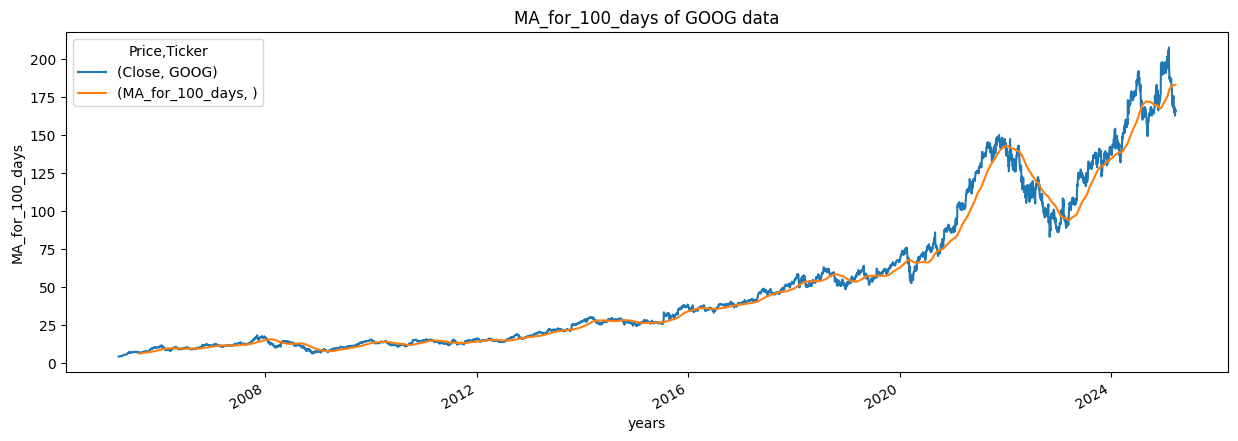

In [ ]:
data['MA_for_100_days']=data['Close'].rolling(100).mean()
plot_graph((15,5),data[['Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

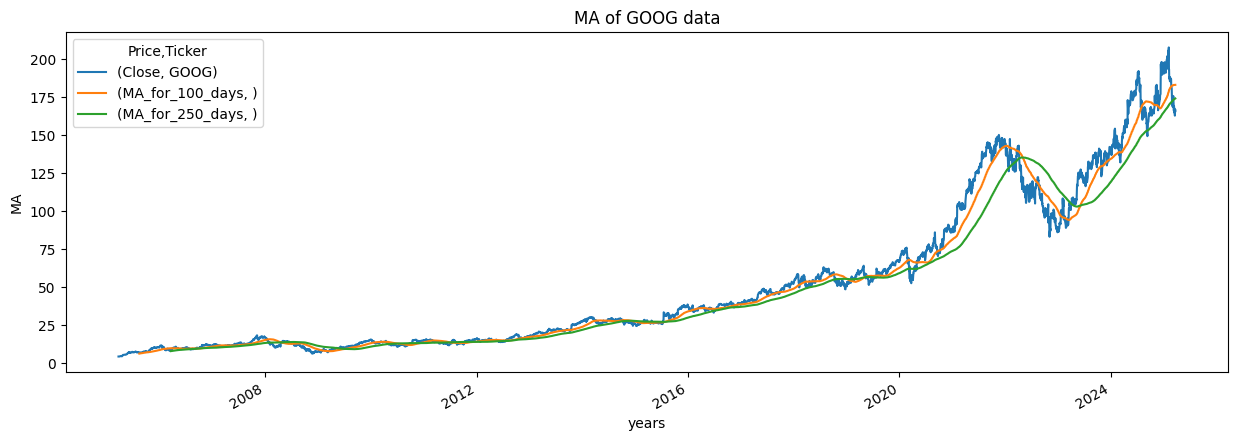

In [ ]:
plot_graph((15,5),data[['Close','MA_for_100_days','MA_for_250_days']],'MA')

In [ ]:
data['percentage_change_cp'] = data['Close'].pct_change()
data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-03-24,4.443470,NaN
2005-03-28,4.497262,0.012106
2005-03-29,4.451402,-0.010197
2005-03-30,4.473216,0.004900
2005-03-31,4.474704,0.000333


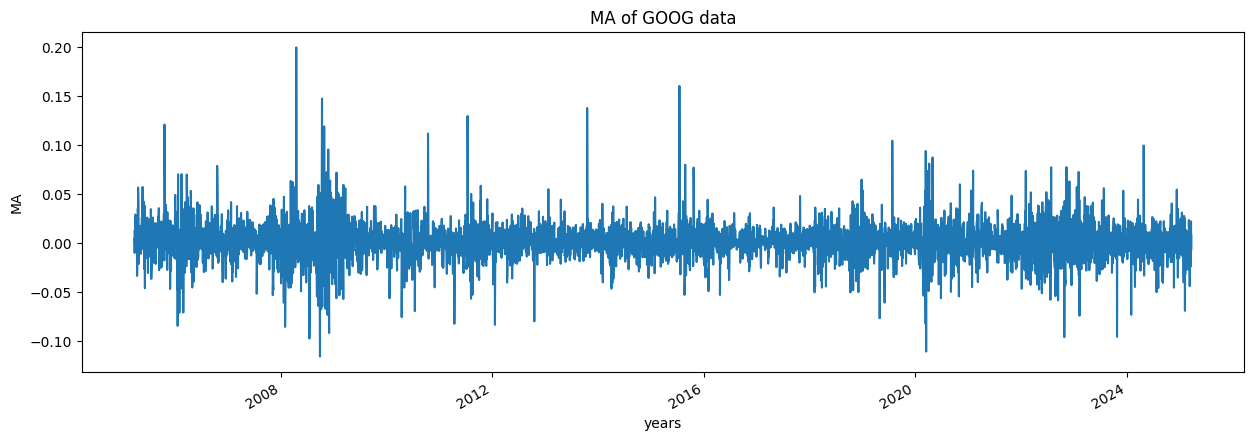

In [ ]:
plot_graph((15,5),data['percentage_change_cp'],'MA')

In [ ]:
Adj_close_price = data[['Close']]

In [ ]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([207.47363281]), array([4.44347]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)

In [ ]:
scaled_data

array([[0.00000000e+00],
       [2.64943505e-04],
       [3.90690034e-05],
       ...,
       [7.97105842e-01],
       [7.91047649e-01],
       [7.96958086e-01]])

In [ ]:
len(scaled_data)

5031

In [ ]:
x_data=[]
y_data=[]

for i in range(100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i,0])

In [ ]:
import numpy as np

x_data , y_data = np.array(x_data) , np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[0.00000000e+00],
        [2.64943505e-04],
        [3.90690034e-05],
        [1.46510524e-04],
        [1.53838164e-04],
        [9.64547581e-05],
        [7.37458852e-04],
        [1.13793551e-03],
        [1.21729479e-03],
        [1.77161197e-03],
        [1.56283060e-03],
        [1.70690562e-03],
        [1.79603509e-03],
        [1.67027681e-03],
        [1.48957298e-03],
        [7.02051320e-04],
        [9.42581102e-04],
        [1.48346897e-03],
        [2.30151307e-03],
        [3.04874211e-03],
        [4.46384091e-03],
        [5.40642201e-03],
        [4.82279897e-03],
        [4.94855724e-03],
        [4.90826931e-03],
        [4.97542291e-03],
        [5.25502404e-03],
        [5.73120086e-03],
        [6.01323749e-03],
        [5.82765327e-03],
        [5.95463516e-03],
        [5.71044156e-03],
        [5.92777185e-03],
        [6.35389055e-03],
        [6.04010316e-03],
        [6.10359293e-03],
        [6.32458469e-03],
        [6.57854848e-03],
        [7.3

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451,)
(1480, 100, 1)
(1480,)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [ ]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam' , loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

3451/3451 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - loss: 2.3813e-04


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
predictions

array([[0.2874817 ],
       [0.2842011 ],
       [0.28240865],
       ...,
       [0.77998877],
       [0.7783337 ],
       [0.77693707]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 62.810925],
       [ 62.14486 ],
       [ 61.780945],
       ...,
       [162.80472 ],
       [162.46869 ],
       [162.18512 ]], dtype=float32)

In [ ]:
# Reshape y_test to a 2D array before applying inverse_transform
inv_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
inv_y_test

array([[ 58.99058914],
       [ 59.18915558],
       [ 58.42825699],
       ...,
       [166.27999878],
       [165.05000305],
       [166.25      ]])

In [ ]:
import pandas as pd

ploting_data = pd.DataFrame(
    {
        'original_test_data' : inv_y_test.reshape(-1),
        'predictions' : inv_predictions.reshape(-1)

    },
    index = data.index[splitting_len+100:]


)

In [ ]:
ploting_data.head()

,original_test_data,predictions
Date,,
2019-05-03,58.990589,62.810925
2019-05-06,59.189156,62.144859
2019-05-07,58.428257,61.780945
2019-05-08,58.038601,61.480122
2019-05-09,57.845020,61.192410


<Figure size 640x480 with 0 Axes>

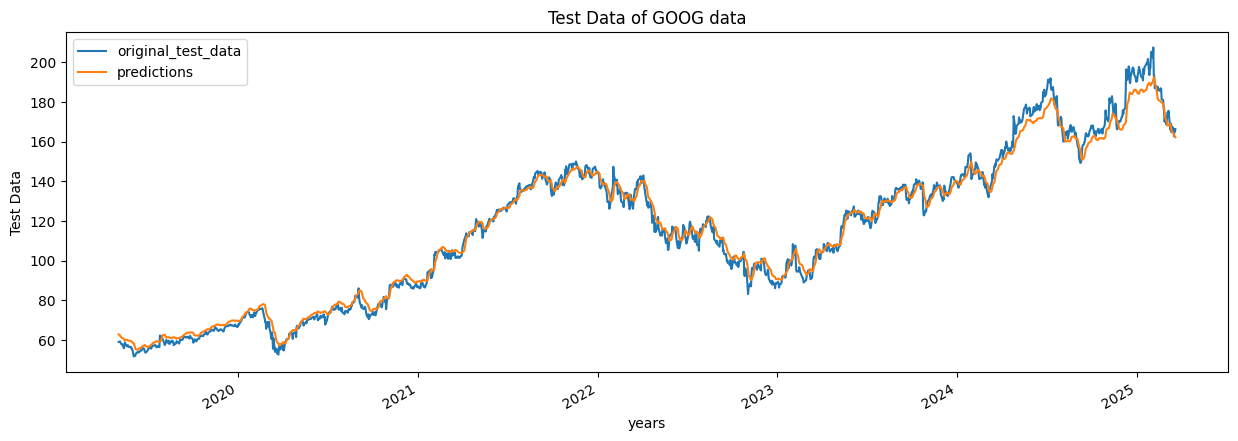

In [ ]:
plot_graph((15,5),ploting_data,'Test Data')

<Figure size 640x480 with 0 Axes>

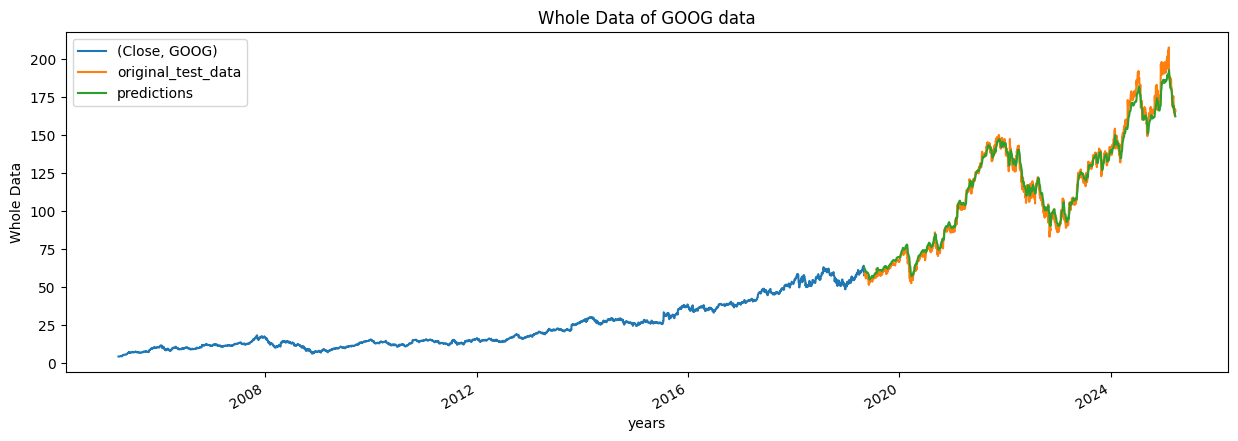

In [ ]:
plot_graph((15,5),pd.concat([Adj_close_price[:splitting_len+100],ploting_data],axis=0),'Whole Data')

In [ ]:
model.save("Latest_stock_price_model.LSTM.keras")

In [ ]:
rmse = np.sqrt(np.mean(((inv_predictions - inv_y_test) ** 2).mean()))
rmse

np.float64(4.171354716882605)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from sklearn.metrics import mean_squared_error
import numpy as np

# Build the Bi-LSTM model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(x_train.shape[1], 1)))
bi_lstm_model.add(Bidirectional(LSTM(units=50)))
bi_lstm_model.add(Dense(units=1))

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
bi_lstm_model.fit(x_train, y_train, epochs=100, batch_size=32)

# Make predictions
bi_lstm_predictions = bi_lstm_model.predict(x_test)

# Inverse transform to get actual stock prices
bi_lstm_predictions = scaler.inverse_transform(bi_lstm_predictions)

# Calculate RMSE
bi_lstm_rmse = np.sqrt(mean_squared_error(y_test, bi_lstm_predictions))
print("Bi-LSTM - RMSE:", bi_lstm_rmse)

# Accuracy (same as for RNN, typically RMSE is the metric used in regression tasks)

# Model Summary
bi_lstm_model.summary()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0019
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.9564e-05
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 3.2977e-05
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.3095e-05
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.2938e-05
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.0996e-05
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.1848e-05
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.8259e-05
Epoch 9/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.9801e-05
Epoch 10/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2.1655e-05
Epoch 11/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.8162e-05
Epoch 12/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.8439e-05
Epoch 13/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.6465e-05
Epoch 14/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 100, 100)            │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,905 (952.76 KB)

 Trainable params: 81,301 (317.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 162,604 (635.18 KB)